<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>

</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>


# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd 
import numpy as np 
from math import factorial 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
df_llamadas = pd.read_csv("/datasets/megaline_calls.csv")
df_internet = pd.read_csv("/datasets/megaline_internet.csv")
df_mensajes = pd.read_csv("/datasets/megaline_messages.csv")
df_planes = pd.read_csv("/datasets/megaline_plans.csv")
df_usuarios = pd.read_csv("/datasets/megaline_users.csv")



## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
print(df_planes.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [4]:
# Imprime una muestra de los datos para las tarifas
print(df_planes.head())


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Usuarios/as

In [5]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print(df_usuarios.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [6]:
# Imprime una muestra de datos para usuarios
print(df_usuarios.head())


   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [7]:
df_usuarios["churn_date"]=df_usuarios["churn_date"].fillna("activo")
print(df_usuarios.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [8]:
df_usuarios["reg_date"]= pd.to_datetime(df_usuarios['reg_date'])
df_usuarios["mes"]=df_usuarios["reg_date"].dt.month

In [9]:
print(df_usuarios.info())
print()
print(df_usuarios.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    object        
 8   mes         500 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 35.3+ KB
None

     user_id first_name last_name  age  \
308     1308     Samara    Monroe   46   
425     1425   Latrisha    Larsen   19   
154     1154   Humberto    Pruitt   53   
456     1456    Seymour     Olsen   66   
300     1300       Rene     Frost   23   
343     1343    Teresia     Ewing   43  

## Llamadas

In [10]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print(df_llamadas.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [11]:
# Imprime una muestra de datos para las llamadas
print(df_llamadas.head())


         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [12]:
df_llamadas["call_date"] = pd.to_datetime(df_llamadas["call_date"])
print(df_llamadas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [13]:
df_llamadas["mes"]=df_llamadas["call_date"].dt.month

In [14]:
print(df_llamadas.info())
print()
print(df_llamadas.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   mes        137735 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.3+ MB
None

              id  user_id  call_date  duration  mes
83695   1305_122     1305 2018-11-06      1.15   11
35843   1134_224     1134 2018-11-01      6.80   11
54791   1196_685     1196 2018-01-20      2.91    1
37709   1141_830     1141 2018-07-04      1.84    7
113454   1399_77     1399 2018-11-11      3.76   11
28255   1106_706     1106 2018-10-13      7.97   10
34243    1127_15     1127 2018-08-26     10.48    8
50479    1182_45     1182 2018-10-23      4.76   10

## Mensajes

In [15]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print(df_mensajes.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [16]:
# Imprime una muestra de datos para los mensajes
print(df_mensajes.head())


         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [17]:
df_mensajes["message_date"] = pd.to_datetime(df_mensajes["message_date"])


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [18]:
df_mensajes["mes"]= df_mensajes["message_date"].dt.month
print(df_mensajes.info())
print()
print(df_mensajes.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   mes           76051 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB
None

             id  user_id message_date  mes
6934   1057_258     1057   2018-10-22   10
18685   1121_12     1121   2018-12-15   12
50424  1329_331     1329   2018-11-18   11
6321   1055_439     1055   2018-09-07    9
5840   1054_207     1054   2018-08-12    8
11978  1079_377     1079   2018-09-08    9
59092  1374_266     1374   2018-10-04   10
51673  1335_263     1335   2018-12-10   12
32778  1203_423     1203   2018-11-21   11
52896   1339_30     1339   2018-09-23    9


## Internet

In [19]:
# Imprime la información general/resumida sobre el DataFrame de internet
print(df_internet.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [20]:
# Imprime una muestra de datos para el tráfico de internet
print(df_internet.head())


         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [21]:
df_internet["session_date"]=pd.to_datetime(df_internet["session_date"])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [22]:
df_internet["mes"]=df_internet["session_date"].dt.month
print(df_internet.info())
print()
print(df_internet.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   mes           104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ MB
None

             id  user_id session_date  mb_used  mes
72492  1336_568     1336   2018-05-06   262.89    5
51836  1232_426     1232   2018-08-17     0.00    8
84325  1392_293     1392   2018-12-02     0.00   12
14864  1067_228     1067   2018-11-08   197.21   11
19401  1088_116     1088   2018-07-28     0.00    7
67933  1316_191     1316   2018-11-12   881.57   11
65984  1305_178     1305   2018-06-02   689.96    6
60888  1277_191     1277   201

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [23]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(df_planes.info())
print()
print(df_planes)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10     

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Los datos fueron revisados y modificados apropiadamente, ahora se puede empezar a trabajar con ellos comodamente
</div>


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [24]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_per_user_month = df_llamadas.groupby(["user_id","mes"]).size()
calls_count = calls_per_user_month.reset_index(name="num_calls")
print(calls_count)

      user_id  mes  num_calls
0        1000   12         16
1        1001    8         27
2        1001    9         49
3        1001   10         65
4        1001   11         64
...       ...  ...        ...
2253     1498   12         39
2254     1499    9         41
2255     1499   10         53
2256     1499   11         45
2257     1499   12         65

[2258 rows x 3 columns]


In [25]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
calls_mins_duration = df_llamadas.groupby(["user_id","mes"])["duration"].sum().reset_index(name="minutos_duracion")
print(calls_mins_duration.sample(10))

      user_id  mes  minutos_duracion
1708     1374    9            261.78
671      1145    9            492.16
1128     1246    8            656.52
1344     1295   11            587.32
301      1066    6            423.66
355      1076    8            372.56
1881     1408    8            363.51
340      1073    5            258.44
869      1185    9            559.86
779      1166   12            203.66


In [26]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
mensajes_mensual = df_mensajes.groupby(["user_id","mes"]).size().reset_index(name="mensajes enviados")
print(mensajes_mensual)

      user_id  mes  mensajes enviados
0        1000   12                 11
1        1001    8                 30
2        1001    9                 44
3        1001   10                 53
4        1001   11                 36
...       ...  ...                ...
1801     1496    9                 21
1802     1496   10                 18
1803     1496   11                 13
1804     1496   12                 11
1805     1497   12                 50

[1806 rows x 3 columns]


In [27]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
trafico_mensual = df_internet.groupby(["user_id","mes"])["mb_used"].sum().reset_index(name="trafico")
print(trafico_mensual.sample(10))

      user_id  mes   trafico
1037     1216   12  15687.82
690      1145    8  17008.20
158      1042    3   7400.58
1897     1406    8  25606.58
44       1010   10  16937.78
496      1106    5  13256.11
92       1027   11  15839.84
338      1072   12  34185.21
1629     1354   12  18576.39
848      1177   11  11670.71


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [28]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
calls_per_user_month = calls_per_user_month.reset_index()


datos_fusionados = calls_per_user_month.merge(calls_mins_duration,on=["user_id","mes"])
datos_fusionados = datos_fusionados.merge(calls_mins_duration,on=["user_id","mes"])
datos_fusionados = datos_fusionados.merge(trafico_mensual,on=["user_id","mes"])

print(datos_fusionados.sample(5))


      user_id  mes   0  minutos_duracion_x  minutos_duracion_y   trafico
1467     1327    8  22              151.94              151.94   3994.05
323      1070   12  45              297.04              297.04  15401.48
2073     1458   11  30              229.94              229.94  16866.45
111      1030   12  69              395.39              395.39  15567.17
1833     1402   10  45              299.13              299.13  17302.54


In [29]:
# Añade la información de la tarifa
users_with_plans = df_usuarios.merge(df_planes, left_on='plan', right_on='plan_name', how='left')


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [30]:
# Calcula el ingreso mensual para cada usuario
df_llamadas_usuarios = df_llamadas.merge(df_usuarios[['user_id','plan']], on='user_id')
df_llamadas_mes = (
    df_llamadas_usuarios
    .groupby(["user_id","mes","plan"])["duration"]
    .sum()
    .reset_index()
)
df_mensajes_usuarios = df_mensajes.merge(df_usuarios[['user_id','plan']], on='user_id')

df_mensajes_mes = (
    df_mensajes_usuarios
    .groupby(["user_id","mes","plan"])["id"]
    .count()
    .reset_index(name="num_mensajes")
)
df_internet_usuarios = df_internet.merge(df_usuarios[['user_id','plan']], on='user_id')

df_internet_mes = (
    df_internet_usuarios
    .groupby(["user_id","mes","plan"])["mb_used"]
    .sum()
    .reset_index()
)


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

El objetivo de esta sección era crear un conjunto de datos que incluyera todas las columnas necesarias para el analisis posterior de manera que en los siguientes pasos no tuvieras que hacer ninguna otra union
</div>


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

          plan  mes  user_id   duration
0         surf    1     1042   5.935000
1         surf    1     1362   6.639286
2         surf    2     1042   6.504324
3         surf    2     1099   5.260000
4         surf    2     1138   6.837381
...        ...  ...      ...        ...
2253  ultimate   12     1482  10.696000
2254  ultimate   12     1487   7.012679
2255  ultimate   12     1490   6.947000
2256  ultimate   12     1493   6.865846
2257  ultimate   12     1497   5.120926

[2258 rows x 4 columns]


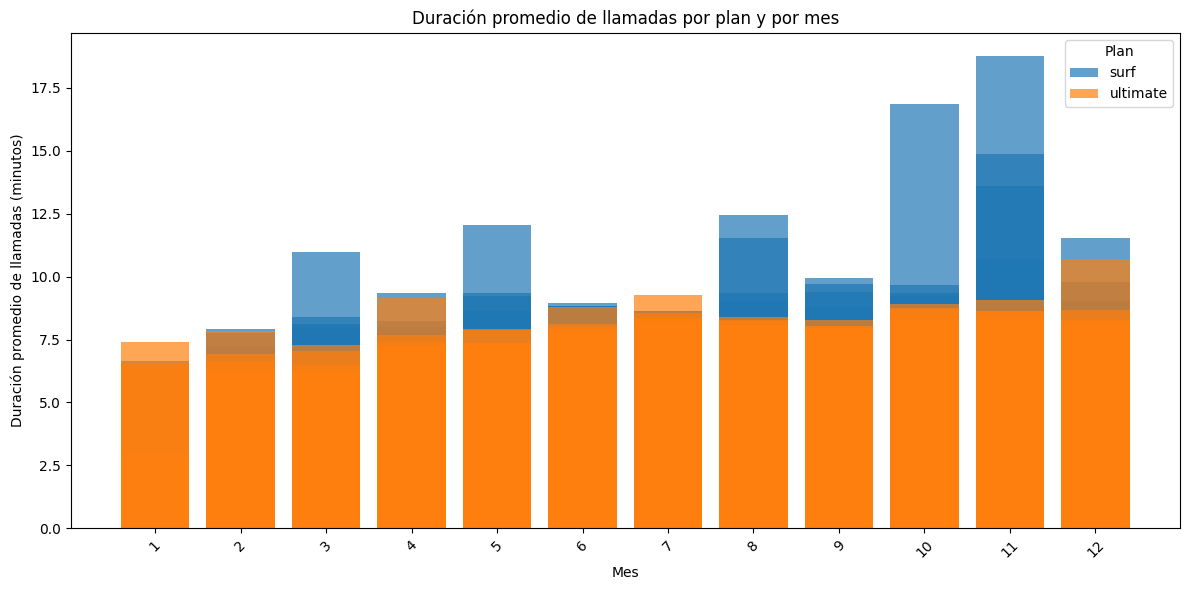

In [31]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

df_llamadas_usuarios = df_llamadas.merge(df_usuarios[['user_id', 'plan']], on='user_id')
promedio = df_llamadas_usuarios.groupby(["plan","mes","user_id"])["duration"].mean().reset_index()
print(promedio)

plt.figure(figsize=(12,6))
for plan in promedio['plan'].unique():
    subset = promedio[promedio['plan'] == plan]
    plt.bar(subset['mes'].astype(str), subset['duration'], label=plan, alpha=0.7)

plt.xlabel("Mes")
plt.ylabel("Duración promedio de llamadas (minutos)")
plt.title("Duración promedio de llamadas por plan y por mes")
plt.xticks(rotation=45)
plt.legend(title="Plan")
plt.tight_layout()
plt.show()



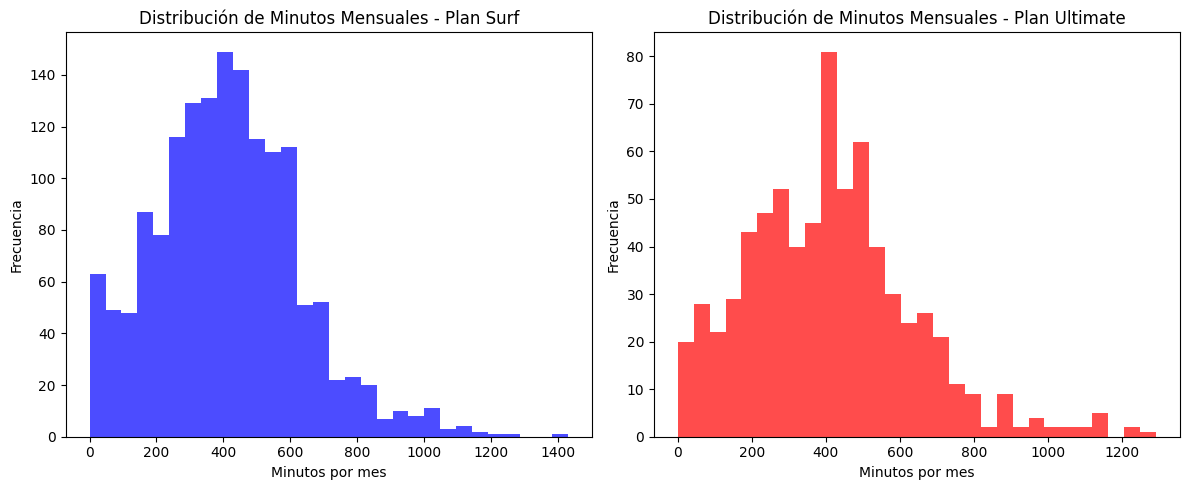

In [32]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
df_llamadas_usuarios['year'] = df_llamadas_usuarios['call_date'].dt.year
df_llamadas_usuarios['month'] = df_llamadas_usuarios['call_date'].dt.month
monthly_minutes = df_llamadas_usuarios.groupby(['user_id', 'year', 'month', 'plan'])['duration'].sum().reset_index()

surf_minutes = monthly_minutes[monthly_minutes['plan'] == 'surf']['duration']
ultimate_minutes = monthly_minutes[monthly_minutes['plan'] == 'ultimate']['duration']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(surf_minutes, bins=30, alpha=0.7, color='blue')
plt.title('Distribución de Minutos Mensuales - Plan Surf')
plt.xlabel('Minutos por mes')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(ultimate_minutes, bins=30, alpha=0.7, color='red')
plt.title('Distribución de Minutos Mensuales - Plan Ultimate')
plt.xlabel('Minutos por mes')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [33]:
# Calcula la media y la varianza de la duración mensual de llamadas.
print("duaracio media:",monthly_minutes["duration"].mean())


duaracio media: 411.4925863596103


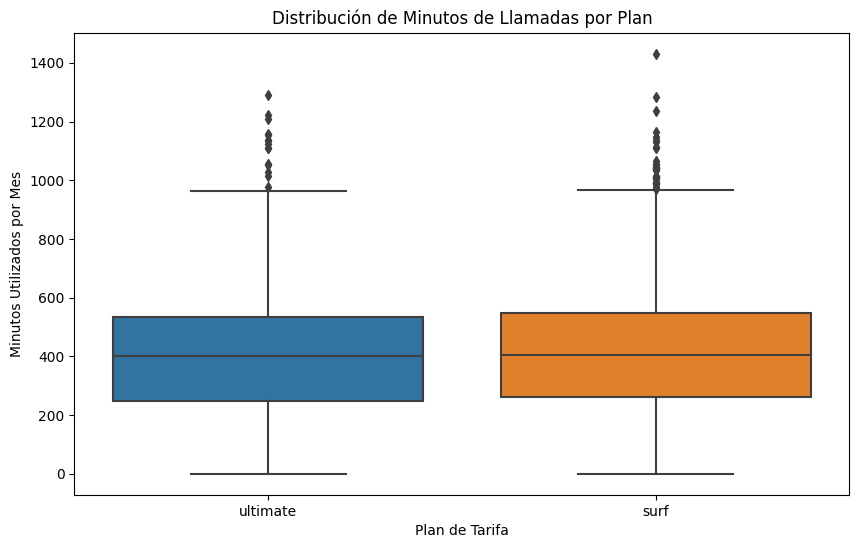

In [34]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(10, 6))
sns.boxplot(data=monthly_minutes, x='plan', y='duration')
plt.title('Distribución de Minutos de Llamadas por Plan')
plt.xlabel('Plan de Tarifa')
plt.ylabel('Minutos Utilizados por Mes')
plt.show()


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Buena manera de mostrar los datos, se puede ver claramente las tendencias de cada uno de los planes gracias a las gráficas que has utilizado con las cuales podemos revisar aspectos diferentes de los planes
</div>


### Mensajes

          plan  mes  user_id  id
0         surf    1     1362  21
1         surf    2     1099   3
2         surf    2     1138   7
3         surf    2     1261  11
4         surf    2     1362  58
...        ...  ...      ...  ..
1801  ultimate   12     1477   2
1802  ultimate   12     1478  14
1803  ultimate   12     1482   5
1804  ultimate   12     1487  66
1805  ultimate   12     1497  50

[1806 rows x 4 columns]


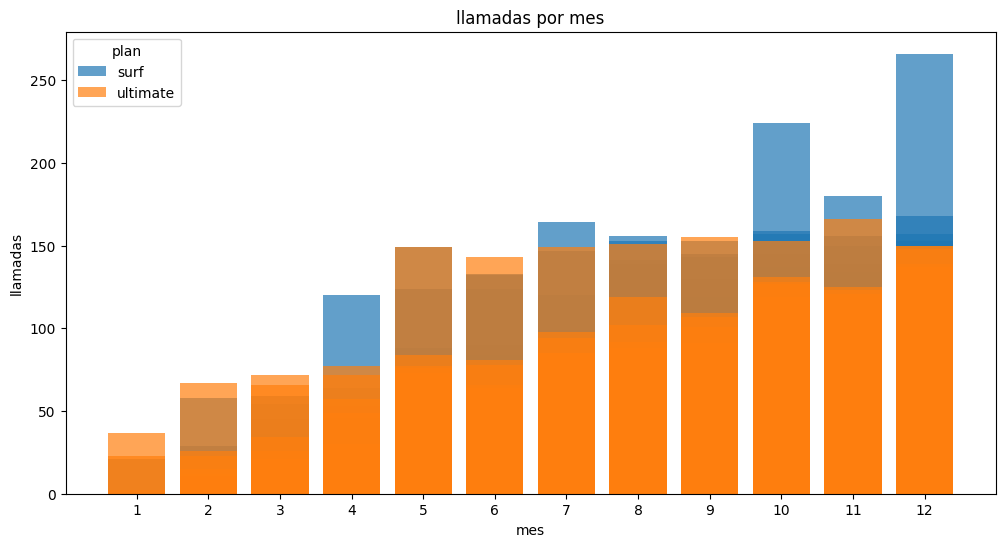

In [35]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
df_mensajes_usuarios = df_mensajes.merge(df_usuarios[['user_id', 'plan']], on='user_id')
promedio = df_mensajes_usuarios.groupby(["plan","mes","user_id"])["id"].count().reset_index()
print(promedio)

plt.figure(figsize=(12,6))
for plan in promedio['plan'].unique():
    subset = promedio[promedio['plan'] == plan]
    plt.bar(subset['mes'].astype(str), subset["id"], label=plan, alpha=0.7)
plt.xlabel("mes")
plt.ylabel("llamadas")
plt.title("llamadas por mes")
plt.legend(title="plan")

<div class="alert alert-block alert-warning">
<b>Comentario del revisor - Revisión 3</b> <a class="tocSkip"></a><br />

El titulo de la gráfica debería incluir `mensajes` y no `llamadas`
</div>


In [36]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
df_internet_usuarios = df_internet.merge(df_usuarios[["user_id","plan"]],on="user_id")
df_internet_mensual = (df_internet_usuarios.groupby(["user_id","plan"])["mb_used"].sum().reset_index())
print(df_internet_mensual)

     user_id      plan    mb_used
0       1000  ultimate    1901.47
1       1001      surf   80437.94
2       1002      surf   40293.33
3       1003      surf   27044.14
4       1004      surf  156352.81
..       ...       ...        ...
484     1495      surf   98890.96
485     1496      surf   64268.64
486     1497  ultimate   11106.55
487     1498      surf  227525.13
488     1499      surf   71350.23

[489 rows x 3 columns]


<div class="alert alert-block alert-warning">
<b>Comentario del revisor - Revisión 3</b> <a class="tocSkip"></a><br />

Los datos relacionados al internet no deberían estar en esta sección
</div>


<div class="alert alert-block alert-danger">
<b>Comentario del revisor - Revisión 2</b> <a class="tocSkip"></a><br />

Se deben mostrar resultados de la misma manera que se hizo en la sección de `llamadas`, comparando los `mensajes` entre los distintos planes.

Es casi exactamente la misma manera en que lo hiciste con las llamadas, solo cambiando las columnas relacionadas con llamadas por las columnas relacionadas con los mensajes
</div>


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

### Internet

          plan  mes  user_id     mb_used
0         surf    1     1042  231.866250
1         surf    1     1362  358.854091
2         surf    2     1042  485.820000
3         surf    2     1099  599.780000
4         surf    2     1138  326.383000
...        ...  ...      ...         ...
2272  ultimate   12     1482  560.330000
2273  ultimate   12     1487  285.558980
2274  ultimate   12     1490  491.654362
2275  ultimate   12     1493  332.371522
2276  ultimate   12     1497  358.275806

[2277 rows x 4 columns]


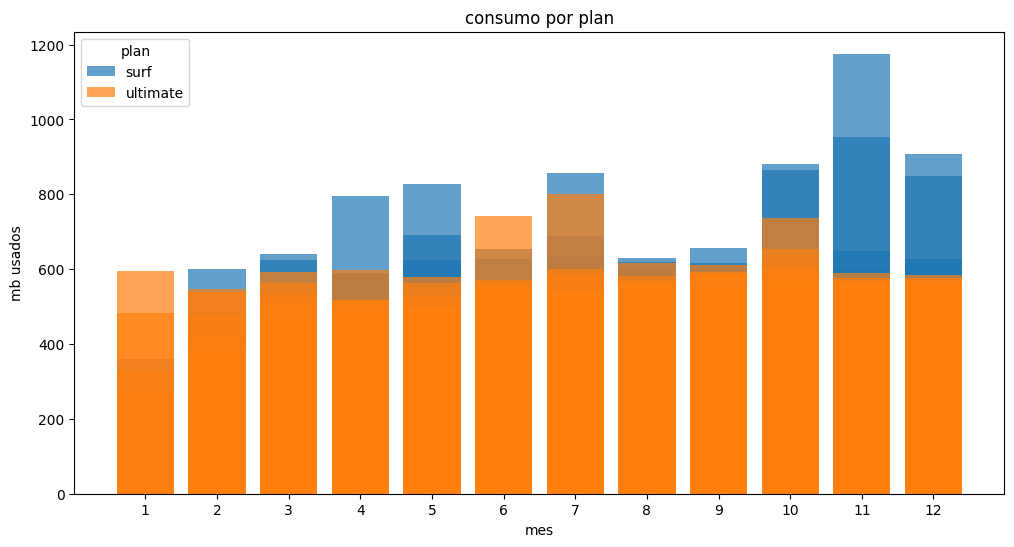

In [37]:
df_internet_usuarios = df_internet.merge(df_usuarios[['user_id', 'plan']], on='user_id')
promedio = df_internet_usuarios.groupby(["plan","mes","user_id"])["mb_used"].mean().reset_index()
print(promedio)

plt.figure(figsize=(12,6))
for plan in promedio['plan'].unique():
    subset = promedio[promedio['plan'] == plan]
    plt.bar(subset['mes'].astype(str), subset["mb_used"], label=plan, alpha=0.7)
plt.xlabel("mes")
plt.ylabel("mb usados")
plt.title("consumo por plan")
plt.legend(title="plan")

<div class="alert alert-block alert-success">
<b>Comentario del revisor - Revisión 3</b> <a class="tocSkip"></a><br />

Corregido!
</div>


<div class="alert alert-block alert-danger">
<b>Comentario del revisor - Revisión 2</b> <a class="tocSkip"></a><br />

Se deben mostrar resultados de la misma manera que se hizo en la sección de `llamadas`, comparando el consumo de `internet` entre los distintos planes.

Es casi exactamente la misma manera en que lo hiciste con las llamadas, solo cambiando las columnas relacionadas con llamadas por las columnas relacionadas con internet
</div>


[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [38]:
def calcular_revenue(row):
    plan = row['plan_name']
    minutos = row['usd_per_minute']
    sms = row['usd_per_message'] 
    gb = row['usd_per_gb']
    
    if plan == 'surf':
        revenue = 20
        
       
        if minutos > 500:
            revenue += (minutos - 500) * 0.03
        if sms > 50:
            revenue += (sms - 50) * 0.03
        if gb > 15:
            revenue += (gb - 15) * 10
            
    elif plan == 'ultimate':
        
        revenue = 70
        
        
        if minutos > 3000:
            revenue += (minutos - 3000) * 0.01
        if sms > 1000:
            revenue += (sms - 1000) * 0.01
        if gb > 30:
            revenue += (gb - 30) * 7
    
    return revenue

df_planes['revenue'] = df_planes.apply(calcular_revenue, axis=1)

<div class="alert alert-block alert-warning">
<b>Comentario del revisor - Revisión 3</b> <a class="tocSkip"></a><br />

No se estan mostrando resultados que comparen los ingresos de cada uno de los planes
</div>


<div class="alert alert-block alert-danger">
<b>Comentario del revisor  - Revisión 2</b> <a class="tocSkip"></a><br />

Se deben mostrar resultados de la misma manera que se hizo en la sección de `llamadas`, comparando los `ingresos` entre los distintos planes

Es casi exactamente la misma manera en que lo hiciste con las llamadas, solo cambiando las columnas relacionadas con llamadas por las columnas relacionadas con los ingresos
</div>


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [39]:
ingresos_surf = df_planes[df_planes['plan_name'] == 'surf']['revenue']
ingresos_ultimate = df_planes[df_planes['plan_name'] == 'ultimate']['revenue']


statistic, p_value = stats.ttest_ind(ingresos_surf, ingresos_ultimate)

alpha = 0.05
print(f"Estadístico t: {statistic}")
print(f"Valor p: {p_value}")
print(f"Valor alfa: {alpha}")

# Interpretación
if p_value < alpha:
    print("Rechazamos H₀: Hay diferencia significativa en los ingresos")
else:
    print("No rechazamos H₀: No hay evidencia de diferencia significativa")


Estadístico t: nan
Valor p: nan
Valor alfa: 0.05
No rechazamos H₀: No hay evidencia de diferencia significativa


/tmp/ipykernel_31/3964540762.py:5: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  statistic, p_value = stats.ttest_ind(ingresos_surf, ingresos_ultimate)
/.venv/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in true_divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/.venv/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


<div class="alert alert-block alert-warning">
<b>Comentario del revisor - Revisión 3</b> <a class="tocSkip"></a><br />

Se debería usar la información completa de los usuarios y no solo la información de los planes
</div>


<div class="alert alert-block alert-danger">
<b>Comentario del revisor - Revisión 2</b> <a class="tocSkip"></a><br />

Es incorrecta la manera en que se esta haciendo la prueba de hipotesis, se debe calcular el `revenue` por cada uno de los usuarios y de esta manera hacer la prueba. En este caso la prueba se esta haciendo con la tabla de `df_planes` la cual solo tiene dos filas y es la información de los planes, no se puede calcular el revenue a partir de esta tabla.

Una cosa importante que debes revisar es que la columna de revenue no debe tener valores ausentes, debes eliminarlos o reemplazarlos por un valor válido para que la prueba sea exitosa
</div>


In [40]:
df_planes

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,revenue
0,50,15360,500,20,10,0.03,0.03,surf,20
1,1000,30720,3000,70,7,0.01,0.01,ultimate,70


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [43]:
df_usuarios

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,mes
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,activo,12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,activo,8
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,activo,10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,activo,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,activo,5
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,activo,9
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,activo,2
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,activo,12
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,activo,2


In [44]:
df_planes

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,revenue
0,50,15360,500,20,10,0.03,0.03,surf,20
1,1000,30720,3000,70,7,0.01,0.01,ultimate,70


In [47]:
df_merged = df_planes.merge(df_usuarios[['user_id', 'city', 'plan']], left_on='plan_name', right_on='plan', how='left')

ingresos_ny_nj = df_merged[df_merged['city'].str.contains("NY-NJ", case=False, na=False)]['revenue']
ingresos_otras = df_merged[~df_merged['city'].str.contains("NY-NJ", case=False, na=False)]['revenue']


statistic, p_value = stats.ttest_ind(ingresos_ny_nj, ingresos_otras, equal_var=False)  # Welch por seguridad

alpha = 0.05
print(f"Estadístico t: {statistic}")
print(f"Valor p: {p_value}")
print(f"Valor alfa: {alpha}")


if p_value < alpha:
    print("Rechazamos H₀: Hay diferencia significativa en los ingresos promedio")
else:
    print("No rechazamos H₀: No hay evidencia de diferencia significativa")


Estadístico t: -1.5901228923748887
Valor p: 0.11449891680287495
Valor alfa: 0.05
No rechazamos H₀: No hay evidencia de diferencia significativa


<div class="alert alert-block alert-warning">
<b>Comentario del revisor - Revisión 3</b> <a class="tocSkip"></a><br />

Se debería usar la información completa de los usuarios y no solo la información de revenue de los planes
</div>


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]